In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


In [2]:

# Load dataset
data = pd.read_csv('Sugar.csv')



In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         16969 non-null  int64  
 1   Blood Glucose Level(BGL)    16969 non-null  int64  
 2   Diastolic Blood Pressure    16969 non-null  int64  
 3   Systolic Blood Pressure     16969 non-null  int64  
 4   Heart Rate                  16969 non-null  int64  
 5   Body Temperature            16969 non-null  float64
 6   SPO2                        16969 non-null  int64  
 7   Sweating  (Y/N)             16969 non-null  int64  
 8   Shivering (Y/N)             16969 non-null  int64  
 9   Diabetic/NonDiabetic (D/N)  16969 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.3 MB


In [18]:
# encod categorical columns
data['Diabetic/NonDiabetic (D/N)']= data['Diabetic/NonDiabetic (D/N)'].map({'D': 1, 'N': 0})
data

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,0
1,9,80,73,119,102,98.300707,94,1,0,0
2,9,70,76,110,81,98.300707,98,1,0,0
3,9,70,78,115,96,98.300707,96,1,0,0
4,66,100,96,144,92,97.807052,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16964,9,71,87,127,90,96.842657,97,0,0,1
16965,9,70,79,117,80,97.869454,98,0,0,1
16966,9,78,82,116,93,96.766282,98,0,0,1
16967,9,83,86,128,91,98.941036,98,0,0,1


In [19]:
data.describe()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,30.988862,95.753668,77.173493,118.187165,91.524191,97.356146,97.382403,0.121692,0.145560,0.980671
std,25.585606,42.982316,7.241511,7.700363,10.409780,0.813555,0.848689,0.326940,0.352674,0.137684
min,9.000000,50.000000,60.000000,95.000000,78.000000,96.000132,93.000000,0.000000,0.000000,0.000000
25%,9.000000,68.000000,71.000000,113.000000,84.000000,96.674465,97.000000,0.000000,0.000000,1.000000
50%,14.000000,83.000000,76.000000,119.000000,89.000000,97.326523,98.000000,0.000000,0.000000,1.000000
75%,55.000000,108.000000,83.000000,124.000000,95.000000,97.949904,98.000000,0.000000,0.000000,1.000000
max,77.000000,250.000000,98.000000,145.000000,130.000000,98.999792,99.000000,1.000000,1.000000,1.000000


In [22]:

# Features and target
X = data[['Age','Blood Glucose Level(BGL)','Diastolic Blood Pressure',
          'Systolic Blood Pressure','Heart Rate','Body Temperature',
          'SPO2']]
y = data['Diabetic/NonDiabetic (D/N)']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
X_train

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2
11491,46,114,81,111,82,96.585460,98
14963,9,73,85,112,92,96.761555,97
8803,55,96,80,114,85,98.494862,96
2558,9,66,65,110,115,96.615548,96
14643,14,249,83,119,90,98.947225,97
...,...,...,...,...,...,...,...
11284,9,113,88,112,91,98.683689,98
11964,55,117,84,110,80,98.912351,96
5390,55,69,70,104,88,96.890621,96
860,14,61,71,112,97,97.356567,98


11491    1
14963    1
8803     1
2558     1
14643    1
        ..
11284    1
11964    1
5390     1
860      1
15795    1
Name: Diabetic/NonDiabetic (D/N), Length: 13575, dtype: int64

In [ ]:

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# add lables for feature importance
feature_names = X.columns   
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()



# Blance the data 

Accuracy: 0.7934590453741898
[[  54   13]
 [ 688 2639]]
              precision    recall  f1-score   support

           0       0.07      0.81      0.13        67
           1       1.00      0.79      0.88      3327

    accuracy                           0.79      3394
   macro avg       0.53      0.80      0.51      3394
weighted avg       0.98      0.79      0.87      3394



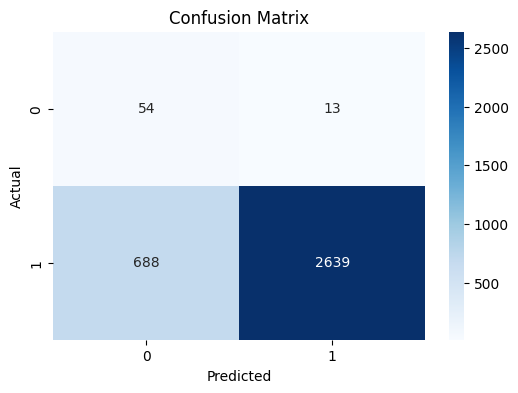

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)
# Predict
y_pred = model.predict(X_test_scaled)   
# check metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# accourcy vissualization
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# use of imblearn

In [40]:
# Blance the data 
# --- IGNORE ---    
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
# matrics after balancing
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)
# Predict
y_pred = model.predict(X_test_scaled)
# chaeck metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Accuracy: 0.8008249852681202
[[  54   13]
 [ 663 2664]]
              precision    recall  f1-score   support

           0       0.08      0.81      0.14        67
           1       1.00      0.80      0.89      3327

    accuracy                           0.80      3394
   macro avg       0.54      0.80      0.51      3394
weighted avg       0.98      0.80      0.87      3394



# XGBoost Algoritthum

In [8]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Example data
data = pd.read_csv("Sugar.csv")
data['Diabetic/NonDiabetic (D/N)']= data['Diabetic/NonDiabetic (D/N)'].map({'D': 1, 'N': 0})

# Encode target
y = data['Diabetic/NonDiabetic (D/N)']
X = data[['Age','Blood Glucose Level(BGL)','Diastolic Blood Pressure',
          'Systolic Blood Pressure','Heart Rate','Body Temperature',
          'SPO2']]

# Train-test split (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate imbalance ratio
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Train XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=ratio, n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[  66    0]
 [  19 3309]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        66
           1       1.00      0.99      1.00      3328

    accuracy                           0.99      3394
   macro avg       0.89      1.00      0.94      3394
weighted avg       1.00      0.99      0.99      3394

ROC-AUC Score: 0.9997268356643356


In [9]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# ==============================
# Load Data
# ==============================
data = pd.read_csv("Sugar.csv")
data['Diabetic/NonDiabetic (D/N)'] = data['Diabetic/NonDiabetic (D/N)'].map({'D': 1, 'N': 0})

y = data['Diabetic/NonDiabetic (D/N)']
X = data[['Age','Blood Glucose Level(BGL)','Diastolic Blood Pressure',
          'Systolic Blood Pressure','Heart Rate','Body Temperature','SPO2']]

# ==============================
# Train Test Split (Stratified)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==============================
# Scaling
# ==============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================
# Handle Class Imbalance
# ==============================
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# ==============================
# Base Model
# ==============================
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=ratio,
    eval_metric="auc",
    random_state=42,
    use_label_encoder=False
)

# ==============================
# Hyperparameter Grid
# ==============================
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [200, 400],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3]
}

# ==============================
# Grid Search (Recall Focus)
# ==============================
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

# ==============================
# Best Model
# ==============================
best_model = grid.best_estimator_

print("Best Parameters:")
print(grid.best_params_)

# ==============================
# Evaluation
# ==============================
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\Muhammad Umair\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:59:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 1.0}

Confusion Matrix:
[[  66    0]
 [  19 3309]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        66
           1       1.00      0.99      1.00      3328

    accuracy                           0.99      3394
   macro avg       0.89      1.00      0.94      3394
weighted avg       1.00      0.99      0.99      3394

ROC-AUC Score: 0.9997222829254079


In [11]:
# save the model
import joblib
joblib.dump(best_model, 'xgb_diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [14]:
!pip install fastapi


   ------------- -------------------------- 1/3 [starlette]
   ------------- -------------------------- 1/3 [starlette]
   ------------- -------------------------- 1/3 [starlette]
   ------------- -------------------------- 1/3 [starlette]
   ------------- -------------------------- 1/3 [starlette]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   

In [15]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# =============================
# Load Model & Scaler
# =============================
model = joblib.load("xgb_diabetes_model.pkl")
scaler = joblib.load("scaler.pkl")

# =============================
# Initialize FastAPI
# =============================
app = FastAPI(
    title="Diabetes Prediction API",
    description="Predict Diabetic / Non-Diabetic using XGBoost",
    version="1.0"
)

# =============================
# Input Schema
# =============================
class PatientData(BaseModel):
    Age: int
    Blood_Glucose_Level: float
    Diastolic_BP: float
    Systolic_BP: float
    Heart_Rate: float
    Body_Temperature: float
    SPO2: float

# =============================
# Health Check
# =============================
@app.get("/")
def home():
    return {"status": "API is running"}

# =============================
# Prediction Endpoint
# =============================
@app.post("/predict")
def predict(data: PatientData):

    # Convert input to array
    input_data = np.array([[
        data.Age,
        data.Blood_Glucose_Level,
        data.Diastolic_BP,
        data.Systolic_BP,
        data.Heart_Rate,
        data.Body_Temperature,
        data.SPO2
    ]])

    # Scale input
    input_scaled = scaler.transform(input_data)

    # Predict probability
    prob = model.predict_proba(input_scaled)[0][1]

    # Threshold (medical safe)
    prediction = 1 if prob > 0.35 else 0

    return {
        "Diabetes_Probability": round(float(prob), 4),
        "Prediction": "Diabetic" if prediction == 1 else "Non-Diabetic"
    }


In [18]:
!pip install streamlit

   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.0 MB 268.7 kB/s eta 0:00:32
   -- ------------------------------------- 0.5/9.0 MB 268.7 kB/s eta 0:00:32
   -- ------------------------------------- 0.5/9.0 MB 268.7 kB/s eta 0:00:32
   --- ------------------------------------ 0.8/9.0 MB 304.8 kB/s eta 0:00:28
   --- ------------------------------------ 0.8/9.0 MB 304.8 kB/s eta 0:00:28
   --- ------------------------------------ 0.8/9.0 MB 304.8 kB/s eta 0:00:28
   --- ------------------------------------ 0.8/9